<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/PTBlackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import
import os, shutil
from pathlib import Path
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/PythonFiles')
import ImportDriveFiles
import GetTPU
from GetTPU import *
from BashColors import C
from ColabFiles import *

In [ ]:
cdf.updateFiles()
cdf.listColabFiles()

In [ ]:
readMePath=cdf.allFilesDict[126]
with open(readMePath, 'r') as file:
    print(f'{C.Green}{basename(readMePath)}{C.White}\n')
    print(file.read())

In [ ]:
os.chdir('/content/drive/My Drive/PT/Fundamentals')
dirList=glob('*.py')
pth=None
pathList=[]
projectDict={}
counter=0
for filName in dirList:
    fullPath=abspath(filName)
    if fullPath.__contains__('blackJack'):
        counter+=1
        projectDict[counter]=fullPath
        pathList.append(fullPath)
        print(f'{counter}. {C.Green}{fullPath}{C.White}')
for pth in sorted(pathList):
    bn=basename(pth)
    name=os.path.splitext(bn)
    thisModule=name[0]
    print(f'{thisModule}')
    
import control_blackJack_no_es
import main_control_blackJack_no_es
import main_prediction_blackJack as mmain
import prediction_blackJack
# from prediction_blackJack import Agent
os.chdir('/content')

In [ ]:
def copyToContent(path_list):
    os.chdir('/content')
    print(f'{C.BGreen}Copied to /content directory:{C.White}')
    for pth in path_list:
        sourcePath=pth
        destinationPath= os.path.join('/content', basename(pth))
        shutil.copy(sourcePath, destinationPath)
        print(basename(destinationPath))
copyToContent(path_list=pathList)

In [ ]:
addLine='from __future__ import absolute_import'
for pth in pathList:
    with open(pth,'r') as fil:
        print(f'{basename(pth)}\n')
        print(f'{fil.read()}')

episode: 0 win rate 0.0
0.363
0.3735
0.38166666666666665
0.38175
0.3834
0.3883333333333333
0.3922857142857143
0.393625
0.3932222222222222
0.3938
0.3906363636363636
0.3928333333333333
0.39076923076923076
0.3909285714285714
0.3898
0.389125
0.39041176470588235
0.39194444444444443
0.3917894736842105
0.39175
0.39271428571428574
0.39295454545454545
0.3927391304347826
0.39329166666666665
0.3942
0.3945769230769231
0.39444444444444443
0.39585714285714285
0.39634482758620687
0.39516666666666667
0.39619354838709675
0.39640625
0.3961212121212121
0.3968235294117647
0.39671428571428574
0.39691666666666664
0.3968378378378378
0.3974736842105263
0.39815384615384614
0.39845
0.39895121951219514
0.39864285714285713
0.3986511627906977
0.39929545454545456
0.39953333333333335
0.3999782608695652
0.40074468085106385
0.40047916666666666
0.4003061224489796
0.40068
episode: 50000 win rate 0.401
0.4005490196078431
0.4006923076923077
0.40079245283018866
0.4006851851851852
0.4003090909090909
0.4000714285714286
0.400

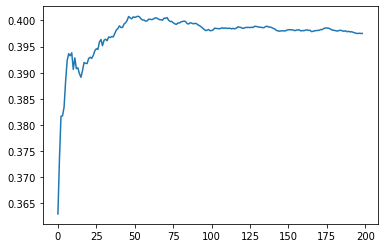

In [27]:
import gym
import matplotlib.pyplot as plt
from control_blackJack_no_es import Agent
import FunctionTimer
from FunctionTimer import ft
startTime=ft.getTimeStamp()
if __name__=='__main__':
    env=gym.make('Blackjack-v0')
    agent=Agent(eps=0.001)
    n_episodes=200000
    win_loose_draw={-1:0, 0:0, 1:0}
    win_rates=[]
    for i in range(n_episodes):
        if i > 0 and i % 1000==0:
            pct=win_loose_draw[1] / i
            print(pct)
            win_rates.append(pct)
        if i % 50000 == 0:
            rates=win_rates[-1] if win_rates else 0.0
            print('episode:', i, 'win rate',  round(rates, 3))
        observation=env.reset()
        done=False
        while not done:
            # agent=agent.choose_action(state=observation) # (observation)
            action=agent.choose_action(state=observation)
            observation_, reward, done, info = env.step(action=action)
            agent.memory.append((observation, action, reward))
            observation=observation_
        agent.update_Q()
        win_loose_draw[reward]+=1
    plt.plot(win_rates)
    plt.show

endTime=ft.getTimeStamp()
ft.tpuTiming(start=startTime, end=endTime)
